In [1]:
#Derin Otokodlayıcılar (Deep Autoencoders)

In [2]:
"""
Kullanım alanları : Boyut azaltma (veri özetleme) 
anomali tespiti
self-learning (kendi kendine öğrenme)
kredi kartı sahtekarlıklarını saptama
görüntülerdeki gürültüyü temizlemek için de kullanılabilir.
"""

'\nKullanım alanları : Boyut azaltma (veri özetleme) \nanomali tespiti\nself-learning (kendi kendine öğrenme)\nkredi kartı sahtekarlıklarını saptama\ngörüntülerdeki gürültüyü temizlemek için de kullanılabilir.\n'

In [5]:
#Anomali (Anormallik) Tespiti

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

In [9]:
#Veri kümesinin yüklenmesi
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",
                  names = ["Age_of_patient", "year_of_operation", "positive_axillary_nodes",
                          "Survival_status"])
print(data.head())

   Age_of_patient  year_of_operation  positive_axillary_nodes  Survival_status
0              30                 64                        1                1
1              30                 62                        3                1
2              30                 65                        0                1
3              31                 59                        2                1
4              31                 65                        4                1


In [10]:
print(data.shape)

(306, 4)


In [11]:
X = data.drop("Survival_status", axis = 1)
y = data["Survival_status"]

In [13]:
#Normalizasyon İşlemi
from sklearn.preprocessing import MinMaxScaler
islem = MinMaxScaler(feature_range = (0, 1))
X = islem.fit_transform(X)

In [15]:
#Otokodlayıcı modelin mimarisi
oznitelik_sayisi = X.shape[1]
#print(X.shape[1])
girislerin_boyutu = Input(shape = (oznitelik_sayisi, ))

#Kodlanacak (encode) değişkenlerin sayısı (darboğaz nöron sayısı)
darbogaz_boyutu = 2

#Kodlayıcı (encoder) katmanının tanımlanması
kodlayici = Dense(3, activation = "relu")(girislerin_boyutu)
kodlayici = Dense(3, activation = "relu")(girislerin_boyutu)

#Darboğazın tanımlanması
kodlayici = Dense(darbogaz_boyutu, activation = "relu")(kodlayici)

#Kod çözücü (decoder) katmanlarının tanımlanması
kod_cozucu = Dense(3, activation = "relu")(kodlayici)
kod_cozucu = Dense(oznitelik_sayisi, activation = "sigmoid")(kodlayici)

#Otokodlayıcı modelin tanımlanması
otokodlayici = Model(
    inputs = girislerin_boyutu,
    outputs = kod_cozucu
)

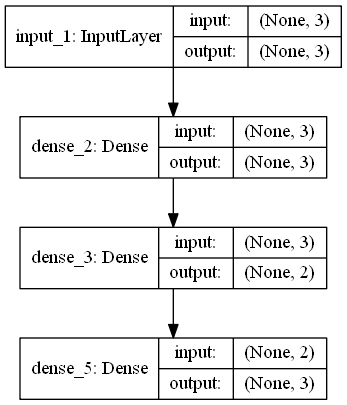

In [16]:
import tensorflow as tf
tf.keras.utils.plot_model(otokodlayici, "0702-EcoHaberman.png", show_shapes = True, show_layer_names = True)

In [17]:
otokodlayici.compile(
    loss = "mse",
    optimizer = "adam"
)

In [18]:
history = otokodlayici.fit(
    X,
    X,
    epochs = 100,
    batch_size = 16,
    verbose = 2,
    validation_split = 0.2
)


Train on 244 samples, validate on 62 samples
Epoch 1/100
 - 0s - loss: 0.1058 - val_loss: 0.1183
Epoch 2/100
 - 0s - loss: 0.1030 - val_loss: 0.1169
Epoch 3/100
 - 0s - loss: 0.0999 - val_loss: 0.1153
Epoch 4/100
 - 0s - loss: 0.0965 - val_loss: 0.1137
Epoch 5/100
 - 0s - loss: 0.0922 - val_loss: 0.1121
Epoch 6/100
 - 0s - loss: 0.0874 - val_loss: 0.1104
Epoch 7/100
 - 0s - loss: 0.0826 - val_loss: 0.1087
Epoch 8/100
 - 0s - loss: 0.0782 - val_loss: 0.1072
Epoch 9/100
 - 0s - loss: 0.0740 - val_loss: 0.1057
Epoch 10/100
 - 0s - loss: 0.0702 - val_loss: 0.1046
Epoch 11/100
 - 0s - loss: 0.0667 - val_loss: 0.1034
Epoch 12/100
 - 0s - loss: 0.0636 - val_loss: 0.1022
Epoch 13/100
 - 0s - loss: 0.0607 - val_loss: 0.1013
Epoch 14/100
 - 0s - loss: 0.0581 - val_loss: 0.1004
Epoch 15/100
 - 0s - loss: 0.0557 - val_loss: 0.0996
Epoch 16/100
 - 0s - loss: 0.0534 - val_loss: 0.0987
Epoch 17/100
 - 0s - loss: 0.0513 - val_loss: 0.0976
Epoch 18/100
 - 0s - loss: 0.0494 - val_loss: 0.0968
Epoch 19/

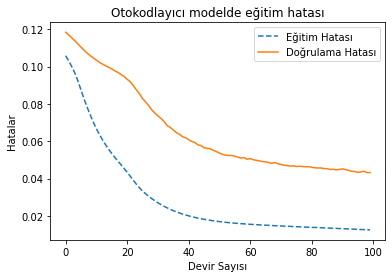

In [20]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Otokodlayıcı modelde eğitim hatası")
plt.ylabel("Hatalar")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim Hatası", "Doğrulama Hatası"], loc = "upper right")
plt.show()

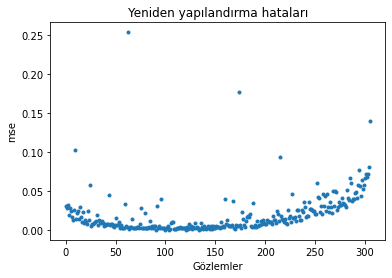

In [21]:
tahminler = otokodlayici.predict(X)
mse = np.mean(np.power(X - tahminler, 2), axis = 1)

#Reconstruction (yeniden yapılandırma) hata grafiği
plt.plot(mse, linewidth = 0, label = "Eğitim", marker = '.')
plt.title("Yeniden yapılandırma hataları")
plt.ylabel("mse")
plt.xlabel("Gözlemler")
plt.show()

In [22]:
print("\n Eşik değeri giriniz : \n")
esik = float(input())


 Eşik değeri giriniz : 

0.11


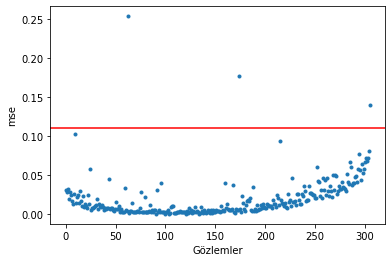

In [23]:
plt.plot(mse, linewidth = 0, label = "Eğitim", marker = ".")
plt.ylabel("mse")
plt.xlabel("Gözlemler")
plt.axhline(y = esik, color = "r")
plt.show()

In [24]:
anormal = pd.DataFrame(data[mse > esik])
print("Anormal değerlerin sayısı:", anormal.shape)

Anormal değerlerin sayısı: (3, 4)


In [25]:
print("Anormal değerler: \n", anormal)

Anormal değerler: 
      Age_of_patient  year_of_operation  positive_axillary_nodes  \
62               43                 58                       52   
174              54                 67                       46   
305              83                 58                        2   

     Survival_status  
62                 2  
174                1  
305                2  


In [26]:
anormal_yok = pd.DataFrame(data[mse <= esik])
print("Önceki veri :", X.shape)

print("Yeni veri :", anormal_yok.shape)

Önceki veri : (306, 3)
Yeni veri : (303, 4)


In [27]:
cikis = pd.DataFrame(anormal_yok)
cikis.to_csv("mydata/en_iyi_vb_grubumun_haberman_projesi.csv", index = False)